Akurasi: 100.00%


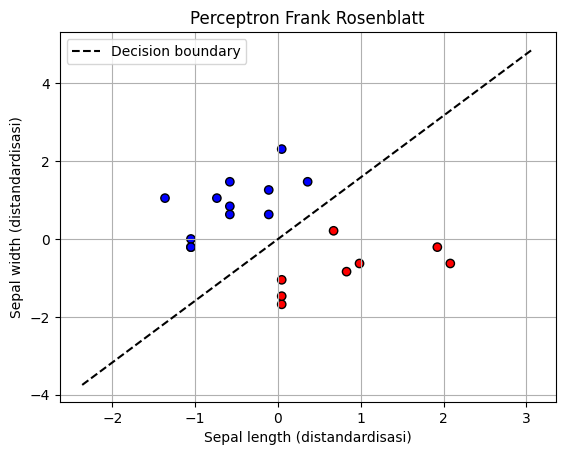

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Ambil hanya dua kelas pertama (Setosa = 0, Versicolor = 1)
X = X[y != 2]
y = y[y != 2]

# Ambil dua fitur pertama (sepal length dan sepal width)
X = X[:, :2]

# Normalisasi
X = (X - X.mean(axis=0)) / X.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
    
    def activation(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation(linear_output)

                # Update aturan Rosenblatt
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

# Inisialisasi model dan latih
model = Perceptron(learning_rate=0.01, n_iter=1000)
model.fit(X_train, y_train)

# Evaluasi akurasi
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Fungsi untuk visualisasi
def plot_decision_boundary(X, y, model):
    x0 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
    x1 = -(model.weights[0] * x0 + model.bias) / model.weights[1]
    plt.plot(x0, x1, '--', color='black', label='Decision boundary')
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel("Sepal length (distandardisasi)")
    plt.ylabel("Sepal width (distandardisasi)")
    plt.title("Perceptron Frank Rosenblatt")
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualisasi
plot_decision_boundary(X_test, y_test, model)


In [1]:
import sklearn
print(sklearn.__version__)

1.6.1


In [3]:
 !pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 1.4 MB/s eta 0:00:001.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 511.3 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 990.6 kB/s eta 0:00:00m eta 0:00:016m0:00:010m
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
